In [32]:
# Import all required libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as mpatches
import seaborn as sns
from matplotlib import cm
plt.style.use("custom_plt_sytle.mplstyle")

# Set plotting style
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

# Constants
P_KB = 64  # Page size in KB
P_MB = P_KB / 1024  # Page size in MB (0.0625)
MB = 1024 * 1024  # Bytes to MB conversion
GB = 1024 * 1024 * 1024  # Bytes to GB conversion

In [33]:
def plot_multiple_constraints(configs, scale='semilogy', policy_thread=32):
    """
    Plot multiple configurations on the same graph for comparison.

    Args:
        configs: List of dicts with 'M_GB', 'D_GB', 'color', 'label' keys
        scale: 'semilogy', 'loglog', or 'linear'
        policy_thread: Thread count to mark with vertical line
    """
    plt.figure()

    # Thread values
    T_values = np.linspace(1, 128, 500)

    # Plot function based on scale
    plot_func = {'semilogy': plt.semilogy, 'loglog': plt.loglog, 'linear': plt.plot}[scale]

        # plt.title('Run Size Constraints Comparison with Policy Lines\n' + 
    #          'Max (Run Gen): RS ≤ M/T  |  Min (Merge): RS ≥ D×P×T/M', fontsize=16)

    for config in configs:
        M_MB = config['M_GB'] * 1024
        D_MB = config['D_GB'] * 1024

        # Constraints
        max_run_size = M_MB / T_values  # Run gen constraint
        min_run_size = (D_MB * P_MB * T_values) / M_MB  # Merge constraint

        # Plot red and blue lines
        plot_func(T_values, max_run_size, '--', color='#1f77b4',
                  linewidth=3, label=f"Run Gen: RS ≤ M/T")
        plot_func(T_values, min_run_size, '-', color='#ff7f0e',
                  linewidth=3, label=f"Merge: RS ≥ D×P×T/M")

    # Add vertical black line at policy_thread
    plt.axvline(x=policy_thread, color='black', linewidth=2, linestyle='-',
                label=f'T = {policy_thread}')

    # Formatting
    plt.xlabel('Number of Threads')
    plt.ylabel('Run Size (MB)')
    plt.grid(True, alpha=0.2)
    plt.xlim(0, 40)

    if scale == 'semilogy':
        plt.ylim(0.1, 100000)
    elif scale == 'linear':
        plt.ylim(0, 5000)

    # Show ticks by 10, 100, 1000, etc.
    if scale in ['semilogy', 'loglog']:
        plt.yticks([0.1, 1, 10, 100, 1000, 10000, 100000],
                   ['0.1', '1', '10', '100', '1K', '10K', '100K'])
    else:
        plt.yticks(np.arange(0, 5001, 500))

    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=3)
    plt.savefig(f'run_length_theoretical.svg', dpi=300)
    plt.savefig(f'run_length_theoretical.png', dpi=300)
    # plt.tight_layout()
    plt.show()

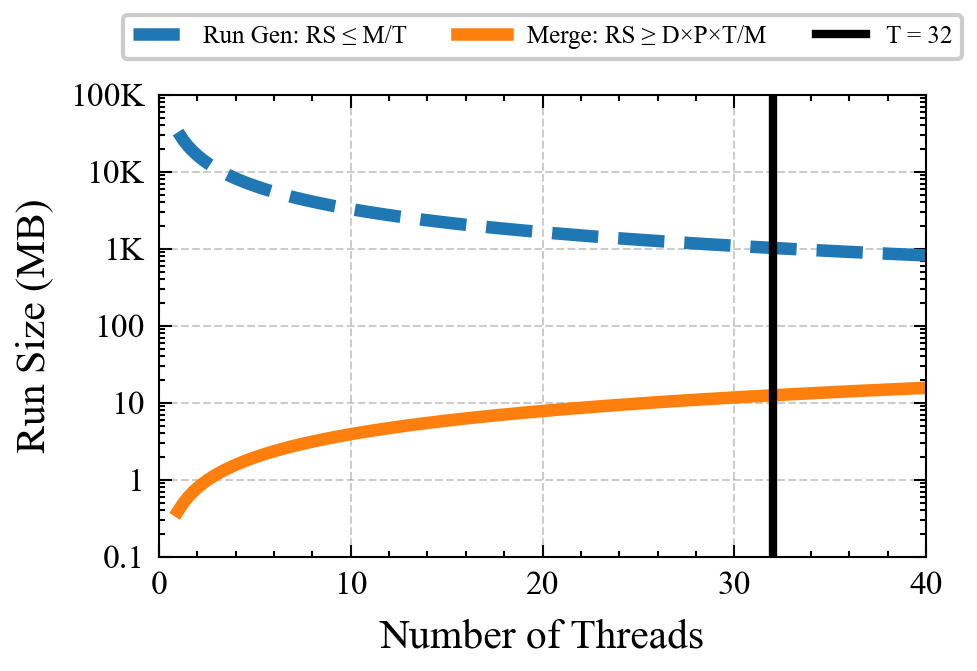

In [34]:
# Example usage: Multiple configurations with policy lines
configs = [
    {'M_GB': 32, 'D_GB': 200, 'color': 'blue', 'label': 'M=32GB, D=200GB'},
]

plot_multiple_constraints(configs, policy_thread=32)